In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.image_aug_methods import *


import seaborn as sns
plt.style.use('seaborn')
sns.set(style="ticks", color_codes=True)

state = 1
np.random.seed(state)


DATA_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/data/'
AUG_DATA_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/data/Aug_data/'
ROOT_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/'
GROUND_PATH = DATA_PATH + 'groundTruth/'
ORI_IMAGE_PATH = DATA_PATH + 'images/'
OUT_IMAGE_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/image/'
MODEL_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/model/'
WEIGHT_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/weight/'
RESULT_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/result/'
LOG_PATH = '/media/tulan/Linux/Pycharm/Image_Edge/logs/'


def save_fig(fig_id, tight_layout=True):
    if not os.path.exists(OUT_IMAGE_PATH):
        os.makedirs(OUT_IMAGE_PATH)
    path = os.path.join(OUT_IMAGE_PATH, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
X_train = np.load(DATA_PATH + 'X_train_ori.npy')
X_val = np.load(DATA_PATH + 'X_val_ori.npy')
X_train.shape, X_val.shape

((200, 320, 480, 3), (100, 320, 480, 3))

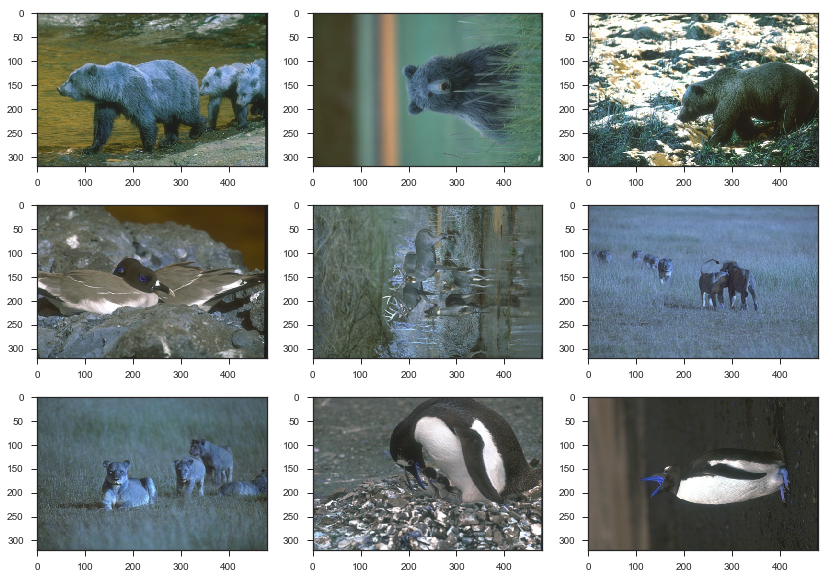

In [9]:
# Visualize training set
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.uint8(X_train[i]))
plt.show()

In [5]:
# scale 0.6, 0.75, 0.9
X_train_scaled_3 = central_scale_images(X_train, IMAGE_SIZE=(320, 480), scales=[0.6, 0.75, 0.9])
X_train_scaled_3.shape

(600, 320, 480, 3)

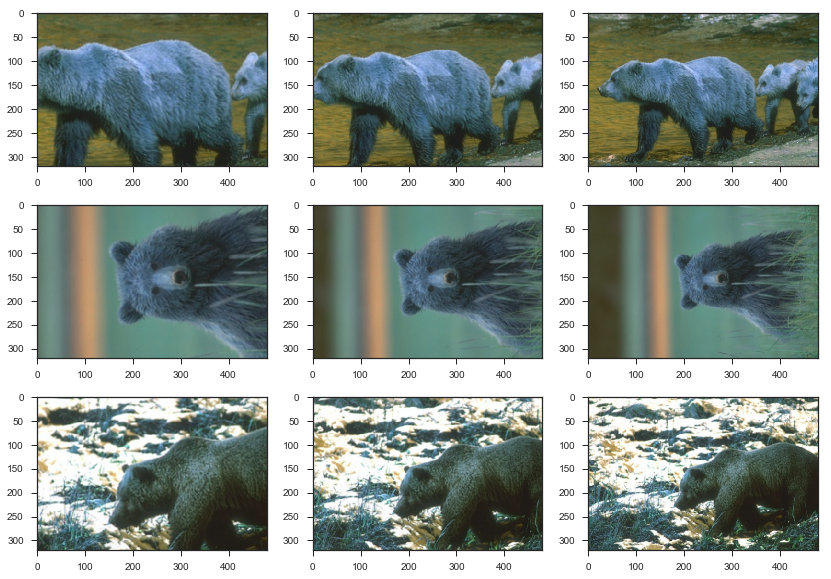

In [11]:
# Visualize training set
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.uint8(X_train_scaled_3[i]))
plt.show()

In [7]:
X_train_flip = flip_images(X_train, IMAGE_SIZE=(320, 480))
X_train_flip.shape

(400, 320, 480, 3)

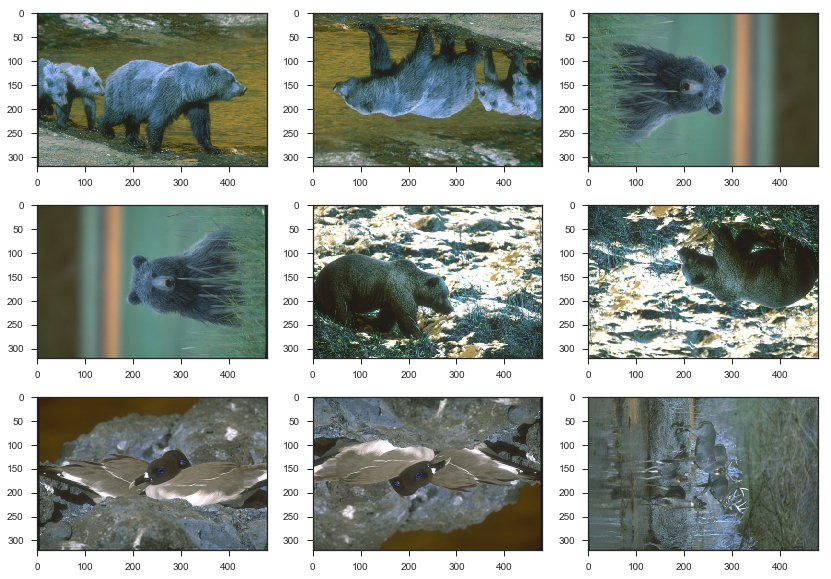

In [12]:
# Visualize training set
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.uint8(X_train_flip[i]))
plt.show()


In [13]:
X_train_noise = add_gaussian_noise(X_train)
X_train_noise.shape

(200, 320, 480, 3)

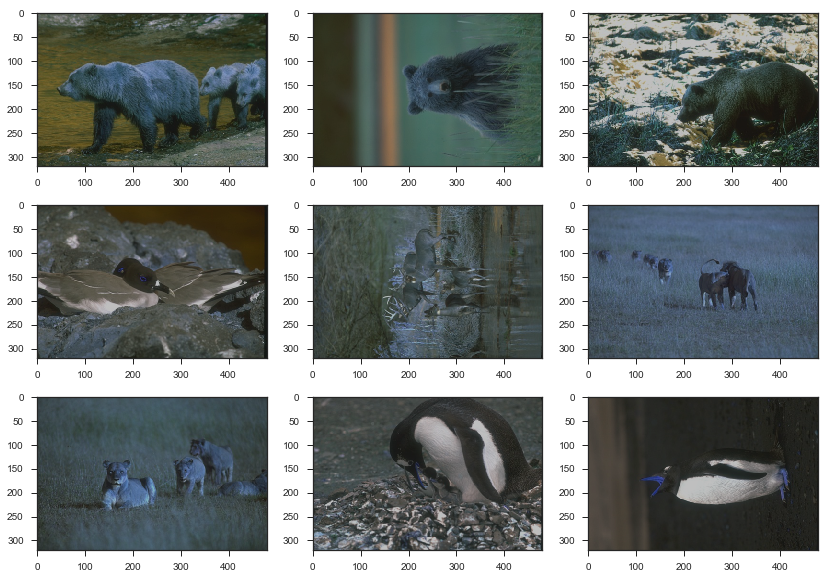

In [14]:
# Visualize training set
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.uint8(X_train_noise[i]))
plt.show()

Process Label

In [47]:
y_train_ori = np.load(DATA_PATH + 'y_train_ori.npy')
y_train_vote = np.load(DATA_PATH + 'y_train_vote.npy')
y_train_vote.shape, y_train_ori.shape

((200, 320, 480, 1), (200, 320, 480, 1))

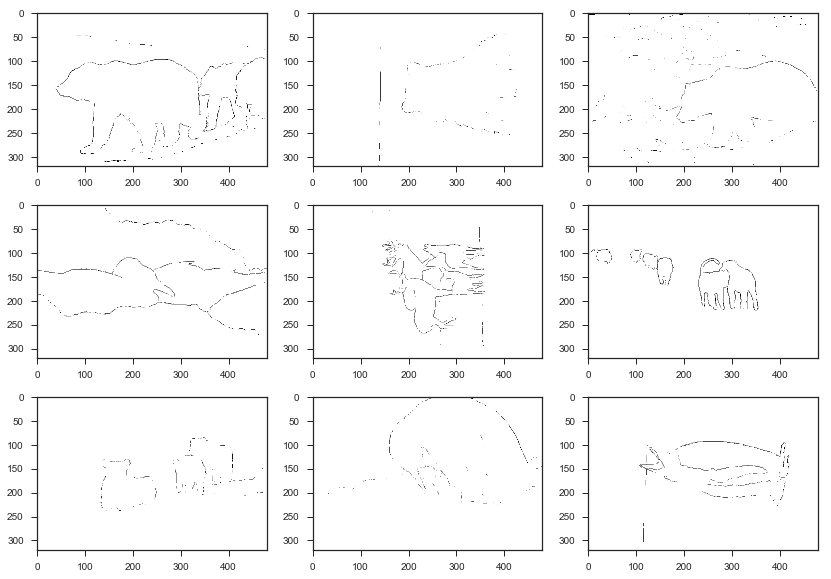

In [48]:
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(y_train_vote[i].reshape(320, 480), cmap='binary')
plt.show()

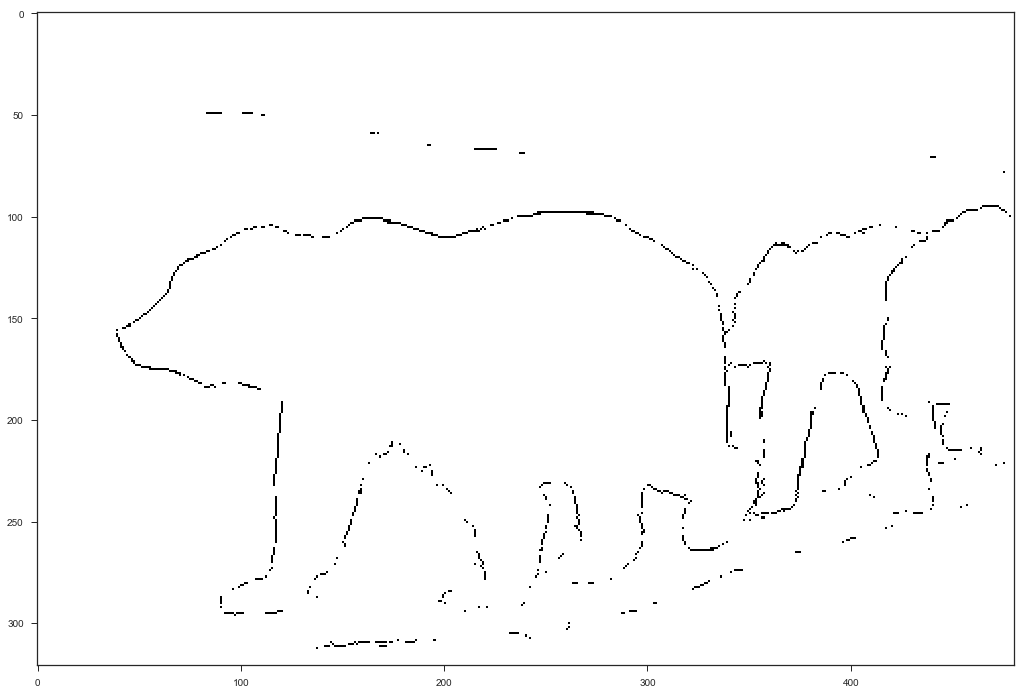

In [35]:
plt.figure(figsize=(20,12))
plt.imshow(y_train[0].reshape(321, 481), cmap='binary')
plt.show()

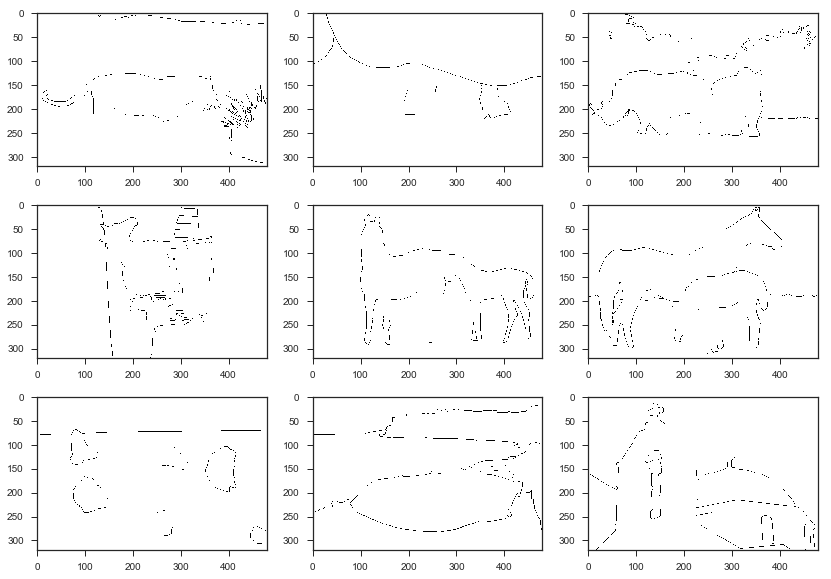

In [26]:
plt.figure(figsize=(14, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(y_train_ori[i+10].reshape(320, 480), cmap='binary')
plt.show()

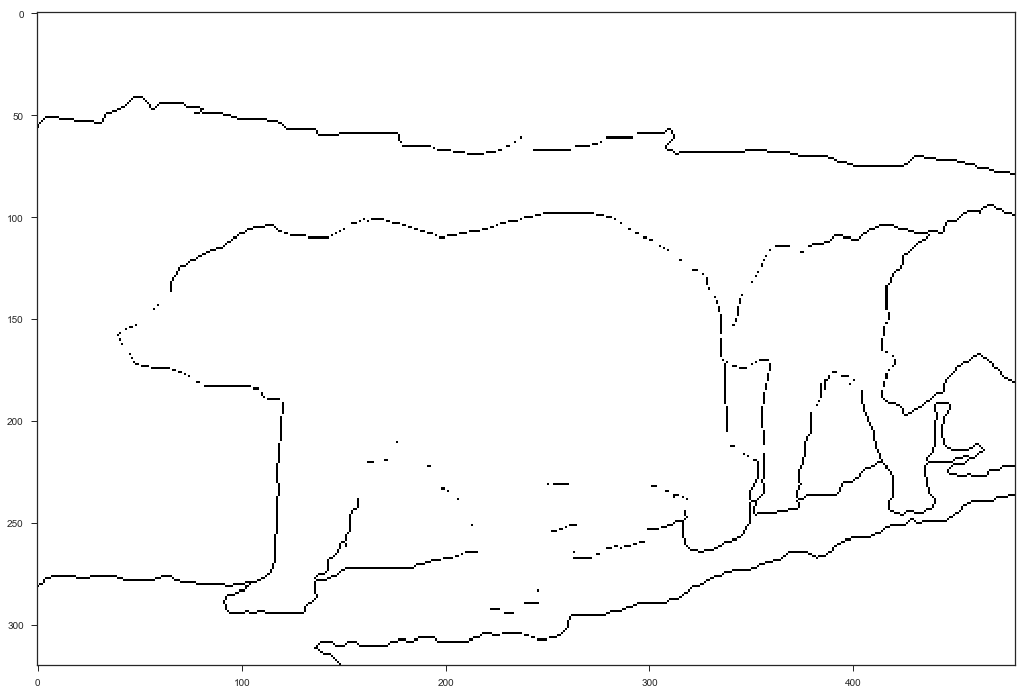

In [37]:
plt.figure(figsize=(20,12))
plt.imshow(y_train_ori[0].reshape(320, 480), cmap='binary')
plt.show()

In [38]:
my_test = cv2.imread(DATA_PATH + 'test.jpg')

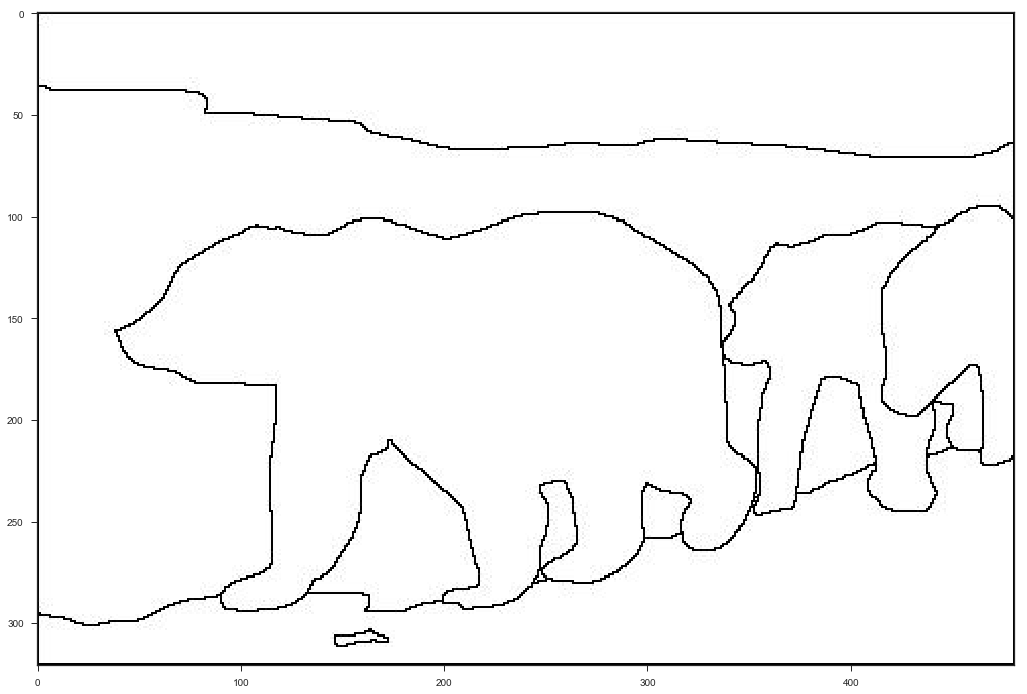

In [41]:
plt.figure(figsize=(20,12))
plt.imshow(my_test, cmap='binary')
plt.show()